Choose operation:
1	Train model.
2	Predict.
Press other key to exit!
Your option: 1
Enter training data set:
Features data: x_train.csv
Outcome data: y_train.csv
Transform input data set...
Transform completed!
Training...
Train completed!
Predict on training data set:


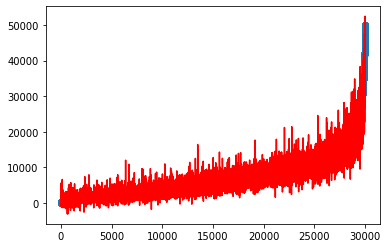

R2: 0.9166362142457309
RMSE: 1760.1263928772896
Enter file name to save model: linear.model
Model saved!
Choose operation:
1	Train model.
2	Predict.
Press other key to exit!
Your option: 2
Enter testing data set:
Features data: x_train.csv
Outcome data: y_train.csv
Enter model file: linear.model
Transform input data set...
Transform completed!
Predict on testing data set:


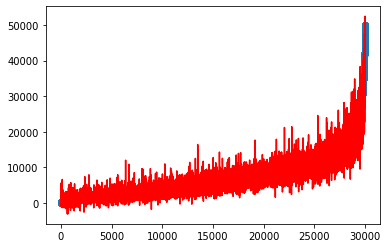

R2: 0.9166362142457309
RMSE: 1760.1263928772896
Choose operation:
1	Train model.
2	Predict.
Press other key to exit!
Your option: 4


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFwe, chi2, SelectPercentile, SelectKBest
import pickle


quality = ['manufacturer', 'model', 'transmission', 'color', 'engineFuel', 'engineType', 'bodyType', 'drivetrain']

def GetData():
    dataset = input('Features data: ')
    resultset = input('Outcome data: ')
    
    data = pd.read_csv(dataset)
    result = pd.read_csv(resultset)
    
    return data, result

def SaveModel(model, encoder, path):
    pickle.dump(model, open(path, 'wb'))
    pickle.dump(encoder, open('encoder.model', 'wb'))
    print('Model saved!')
    
def LoadModel(path):
    return pickle.load(open(path, 'rb')), pickle.load(open('encoder.model', 'rb'))

def FormatCSV(data):
    data.iloc[:, :] = data.iloc[:, :].replace(to_replace = False, value = 0)
    data.iloc[:, :] = data.iloc[:, :].replace(to_replace = True, value = 1)
    data.iloc[:, :] = data.iloc[:, :].replace(to_replace = np.nan, value = 0)
    
def Convert(data, encoder):
    data.loc[:, quality] = encoder.transform(data.loc[:, quality])
    data.year = [(2020-x) for x in data.year]

    
def Transform(data, result, encoder):
    print('Transform input data set...')

    data = data.sort_values(['id'])
    result = result.sort_values(['id'])

    data['price'] = result.price
    data = data.sort_values('price')
    result = result.sort_values('price')

    data = data.drop(['id'], axis = 1)

    Y = data.price.values

    FormatCSV(data)
    Convert(data, encoder)

    X = data.loc[:, data.corr().abs()['price'].sort_values(ascending = False)[1:].index]

    X_2 = X.loc[:, ['odometer', 'feature_7', 'feature_3', 'feature_8', 'feature_6', 'feature_5', 'feature_2', 'feature_4', 'feature_9', 'feature_1', 'feature_0']].values
    X_1 = X.loc[:, ['photos', 'engineFuel', 'bodyType', 'drivetrain', 'transmission', 'model', 'engineType', 'manufacturer', 'year', 'engineCapacity']].values
    
    X_1 = np.nan_to_num(X_1)
    X_2 = np.nan_to_num(X_2)

    from sklearn.preprocessing import PolynomialFeatures
    pr_1 = PolynomialFeatures(degree = 6, interaction_only = False)
    pr_2 = PolynomialFeatures(degree = 1, interaction_only = True)
    X_1 = pr_1.fit_transform(X_1)
    X_2 = pr_2.fit_transform(X_2)

    Z = np.concatenate((X_1, X_2),axis=1)
    
    print('Transform completed!')
    
    return Z, Y

def Predict(linear_regressor, X, Y):
    index = np.arange(0, len(X), 1)
    Y_pred = linear_regressor.predict(X)  # make predictions


    plt.scatter(index, Y)
    plt.plot(index, Y_pred, color='red')
    plt.show()

    rmse = mean_squared_error(Y, Y_pred)**0.5
    print("R2:", linear_regressor.score(X, Y))
    print("RMSE:", rmse)

def Train():
    print('Enter training data set:')
    data, result = GetData()
    
    encoder = OrdinalEncoder()
    encoder.fit(data.loc[:, quality])
    
    X, Y = Transform(data, result, encoder)
    
    print('Training...')
    linear_regressor = LinearRegression(n_jobs = -1)  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    
    print('Train completed!')
    
    print('Predict on training data set:')
    
    Predict(linear_regressor, X, Y)
    
    SaveModel(linear_regressor, encoder, input('Enter file name to save model: '))
    return linear_regressor

def Test():
    print('Enter testing data set:')
    data, result = GetData()
    
    linear_regressor, encoder = LoadModel(input('Enter model file: '))
    
    X, Y = Transform(data, result, encoder)
    
    print('Predict on testing data set:')
    
    Predict(linear_regressor, X, Y)


def Start():
    option = input('Choose operation:\n1\tTrain model.\n2\tPredict.\nPress other key to exit!\nYour option: ') 
    while(option == '1' or option == '2'):
        if(option == '1'):
            Train()
        else:
            Test()
        
        option = input('Choose operation:\n1\tTrain model.\n2\tPredict.\nPress other key to exit!\nYour option: ')
        
Start()